In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('house_data.csv')

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
df.shape

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
y = df['price']

In [7]:
df = df.drop(['date','id'], axis =1)

In [8]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:>

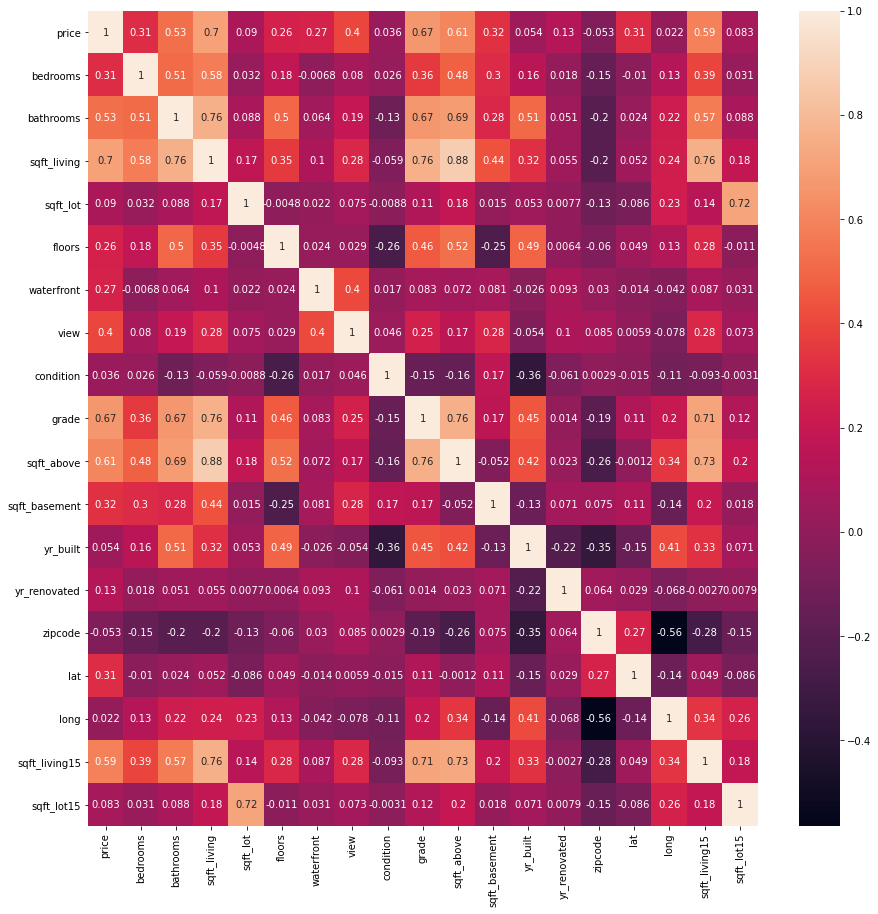

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [10]:
X = df.drop(['price'], axis =1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42, shuffle = True)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16197, 18)
(16197,)
(5400, 18)
(5400,)


In [13]:
from keras import backend as K

def R2(y_test, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_test-y_pred ))
    SS_tot = K.sum(K.square( y_test - K.mean(y_test) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [14]:
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

opt = Adam(learning_rate=0.001)


my_ANN = Sequential()

my_ANN.add(Dense(18,input_shape = (18,), activation = "relu"))
my_ANN.add(Dense(18, activation = "relu"))

earlyStopping = EarlyStopping(monitor = 'val_loss', patience = 100)

my_ANN.add(Dense(1))
my_ANN.compile(optimizer = opt, loss = "mse", metrics=[R2])
history = my_ANN.fit( X_train, y_train, epochs = 5000, validation_data = (X_test, y_test), callbacks=[earlyStopping], verbose=0, batch_size=64)


In [15]:
results= my_ANN.evaluate(X_test,y_test)[1]
results

169/169 [==============================] - 0s 590us/step - loss: 24898078720.0000 - R2: 0.7331


0.7330656051635742

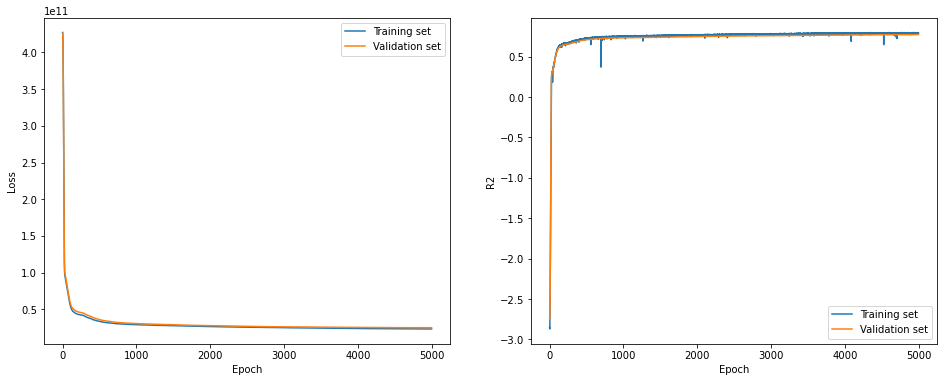

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
plt.figure(figsize = (2*8, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training set')
plt.plot(history.history['val_loss'], label = 'Validation set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['R2'], label = 'Training set')
plt.plot(history.history['val_R2'], label = 'Validation set')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()

plt.show()

In [17]:
X_2=X.drop(['sqft_lot', 'condition', 'yr_built', 'zipcode','long','sqft_lot15'],axis=1)

In [18]:
X_scaled2 = scaler.fit_transform(X_2)
X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, random_state = 42, shuffle = True)

In [19]:
my_ANN = Sequential()

my_ANN.add(Dense(18,input_shape = (12,), activation = "relu"))
my_ANN.add(Dense(18, activation = "relu"))

earlyStopping = EarlyStopping(monitor = 'val_loss', patience = 200)

my_ANN.add(Dense(1))
my_ANN.compile(optimizer = opt, loss = "mse", metrics=[R2])
history = my_ANN.fit( X_train, y_train, epochs = 2000, validation_data = (X_test, y_test), callbacks=[earlyStopping], verbose=0, batch_size=64)


In [20]:
results= my_ANN.evaluate(X_test,y_test)[1]
results

169/169 [==============================] - 0s 548us/step - loss: 37655760896.0000 - R2: 0.6371


0.6371116042137146

The model show significant drop in accuracy when I remove some of the features even though it's not highly correlated. So the best model is still the first model with accuracy of 0.733. Actually based on the graphs above, the accuracy might continue to increase if we increase the epochs